In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from keras.initializers import RandomNormal
import warnings
import pickle
warnings.filterwarnings("ignore")

Using TensorFlow backend.


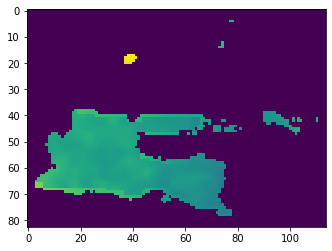

In [2]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [3]:
X

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [4]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
# data tahun 1983-2011
df=df[:-60]

In [5]:
# train -> data 1983-2011
train, test = df, df[-24:]

In [6]:
np.array(train).shape[0]/12

28.0

In [7]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
scaler.fit(test)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)

In [8]:
n_input = 12
n_features = 9462
batch_size=12
# supervised data
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(70, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(80, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(90, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 40)            1520480   
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            18200     
_________________________________________________________________
dropout (Dropout)            (None, 12, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 70)                4270      
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0

In [11]:
model.fit_generator(generator,epochs=90)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/90
27/27 [==============================] - 2s 92ms/step - loss: 0.3343 - mean_absolute_error: 0.3343
Epoch 2/90
27/27 [==============================] - 1s 47ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 3/90
27/27 [==============================] - 1s 47ms/step - loss: 0.0551 - mean_absolute_error: 0.0551
Epoch 4/90
27/27 [==============================] - 1s 48ms/step - loss: 0.0489 - mean_absolute_error: 0.0489
Epoch 5/90
27/27 [==============================] - 1s 47ms/step - loss: 0.0464 - mean_absolute_error: 0.0464
Epoch 6/90
27/27 [==============================] - 1s 48ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 7/90
27/27 [==============================] - 1s 48ms/step - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 8/90
27/27 [==============================] - 1s 48ms/step - loss: 0.0432 - mean_absolute_error: 0.0432
Epoch 9/90
27/27 [==========================

27/27 [==============================] - 1s 49ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 73/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 74/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 75/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 76/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 77/90
27/27 [==============================] - 1s 48ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 78/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 79/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 80/90
27/27 [==============================] - 1s 49ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 81/90
2

In [12]:
model.evaluate_generator(validation_sequence)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.04391777142882347, 0.04391777]

In [13]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [14]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

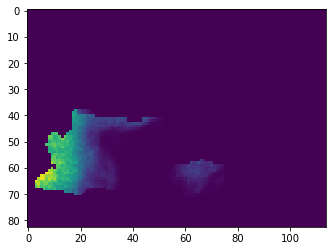

In [15]:
plt.imshow(pred_list[0].reshape(83,114))

In [16]:
train = df
test = df[-24:]

In [17]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [18]:
n_input = 12
n_features = 9462
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [19]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 2/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 3/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 4/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 5/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 6/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 7/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 8/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 9/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 10/9

27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 75/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 76/90
27/27 [==============================] - 1s 53ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 77/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 78/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 79/90
27/27 [==============================] - 1s 53ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 80/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 81/90
27/27 [==============================] - 1s 50ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 82/90
27/27 [==============================] - 1s 51ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 83/90
2

In [20]:
model.evaluate_generator(validation_sequence)

[0.04399466514587402, 0.043994665]

In [21]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [22]:
batch

array([[[1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
         1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
        [1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
         1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
        [1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
         1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
        ...,
        [1.42633153e-05, 1.38404866e-05, 1.30113594e-05, ...,
         1.46254688e-05, 1.30055159e-05, 1.40205211e-05],
        [1.42785848e-05, 1.38550913e-05, 1.30251765e-05, ...,
         1.46409866e-05, 1.30194148e-05, 1.40354650e-05],
        [1.42276813e-05, 1.38061714e-05, 1.29790378e-05, ...,
         1.45892091e-05, 1.29729506e-05, 1.39854137e-05]]])

In [23]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
        1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
       [1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
        1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
       [1.42096860e-05, 1.37889874e-05, 1.29628088e-05, ...,
        1.45708827e-05, 1.29566170e-05, 1.39678732e-05],
       ...,
       [1.42025738e-05, 1.37821235e-05, 1.29563205e-05, ...,
        1.45635750e-05, 1.29501077e-05, 1.39608546e-05],
       [1.42025738e-05, 1.37821235e-05, 1.29563205e-05, ...,
        1.45635750e-05, 1.29501077e-05, 1.39608546e-05],
       [1.42064218e-05, 1.37858706e-05, 1.29598911e-05, ...,
        1.45675476e-05, 1.29537138e-05, 1.39646763e-05]])

In [24]:
pred_list.shape

(60, 9462)

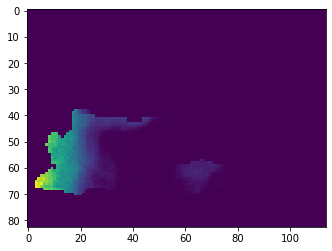

In [25]:
plt.imshow(pred_list[0].reshape(83,114))

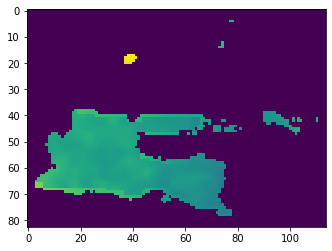

In [26]:
df_asli = data_1
plt.imshow(df_asli[0].reshape(83,114))

In [27]:
max(pred_list[10])

0.09262680695510284

In [28]:
max(df_asli[10])

0.017539296

In [29]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
for pred1 in pred_list:
    mae_ = df_asli[no]-pred1
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

In [30]:
mae

[0.20170464387093232,
 0.1957230750907682,
 0.13338120278335,
 0.030000785373759362,
 -0.0022706767761110757,
 0.011269014873992721,
 0.00547152081339631,
 0.01558292195224634,
 0.3105661146962552,
 0.020258839032124724,
 -0.0022693291540118077,
 0.03734737052510983,
 0.07803646491715859,
 0.11477201008302847,
 0.10077038627277116,
 0.026696550715588335,
 -0.0022706767761110757,
 0.005579719953633722,
 0.018127398150335663,
 0.008242689436852966,
 0.18239560225600324,
 0.009236225221774832,
 -0.0022053927415681585,
 0.0171860154394161,
 0.057067745189262845,
 0.050762431103904035,
 0.0628734626401257,
 0.008191371629420732,
 -0.0022706767761110757,
 0.0050859899440699186,
 0.008432006936182127,
 0.022336476501090573,
 0.07286918987522978,
 0.00825492713843,
 -0.0018745981272113767,
 -0.0022718197245267246,
 0.0604854843398026,
 0.022737664891834677,
 0.017687884837097313,
 -0.0022706767761110757,
 -0.0022706767761110757,
 -0.0022706767761110757,
 -0.0019349943970663884,
 0.007251211734

In [31]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))


In [32]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [33]:
Pred_rata

[0.0022710039933620725,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022706767761110757,
 0.0022706767761110757,
 0.0022706767761110757,
 0.0022710035308460535,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022734420134667786,
 0.0022741337234014588,
 0.0022718197245267246,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022706767761110757,
 0.0022706767761110757,
 0.0022706767761110757,
 0.002270683269282856,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022734645524758144,
 0.0022741331186117296,
 0.0022718194591477866,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022706767761110757,
 0.0022706767761110757,
 0.0022706767761110757,
 0.0022708728443667035,
 0.0022710039933620725,
 0.0022710039933620725,
 0.0022748172629991383,
 0.0022741337234014588,
 0.0022718197245267246,
 0.0022710039933620725,
 0.0022710037140430063,
 0.002271003655687612,
 0.0022706767761110757,
 0.0022706767761110757,
 0.002270676776111

In [34]:
df_asli_rata


[0.20397566,
 0.19799407,
 0.13565221,
 0.032271463,
 0.0,
 0.013539691,
 0.007742524,
 0.017853927,
 0.3128371,
 0.02253228,
 4.8045695e-06,
 0.03961919,
 0.080307476,
 0.11704302,
 0.1030414,
 0.028967226,
 0.0,
 0.007850396,
 0.020398082,
 0.010513693,
 0.1846666,
 0.0115096895,
 6.874037e-05,
 0.019457834,
 0.059338752,
 0.053033434,
 0.065144464,
 0.010462048,
 0.0,
 0.0073566665,
 0.010702879,
 0.024607481,
 0.07514019,
 0.010529744,
 0.00039953558,
 0.0,
 0.062756486,
 0.02500867,
 0.019958887,
 0.0,
 0.0,
 0.0,
 0.00033569173,
 0.009522216,
 0.009292673,
 0.0016805856,
 0.0002217452,
 1.3502024e-05,
 0.17696069,
 0.18594149,
 0.19720568,
 0.040911835,
 0.0,
 0.022085713,
 0.03119794,
 0.045924917,
 0.2649516,
 0.028108876,
 0.00019953931,
 5.2411167e-05]

In [35]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [36]:
len(add_dates)


60

In [37]:
len(Pred_rata)


60

In [38]:
len(df_asli_rata)

60

In [39]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [40]:
df

,bulan,data
0,2012-01-01,0.201705
1,2012-02-01,0.195723
2,2012-03-01,0.133381
3,2012-04-01,0.030001
4,2012-05-01,-0.002271
5,2012-06-01,0.011269
6,2012-07-01,0.005472
7,2012-08-01,0.015583
8,2012-09-01,0.310566
9,2012-10-01,0.020259


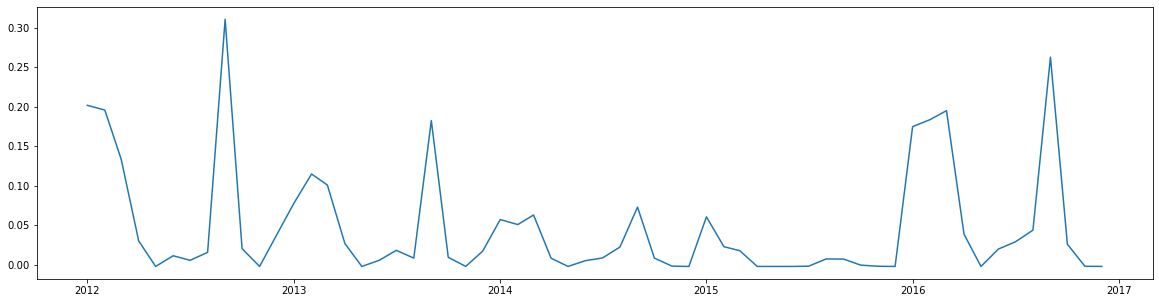

In [41]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [42]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.002271,0.203976
1,2012-02-01,0.002271,0.197994
2,2012-03-01,0.002271,0.135652
3,2012-04-01,0.002271,0.032271
4,2012-05-01,0.002271,0.000000
5,2012-06-01,0.002271,0.013540
6,2012-07-01,0.002271,0.007743
7,2012-08-01,0.002271,0.017854
8,2012-09-01,0.002271,0.312837
9,2012-10-01,0.002273,0.022532


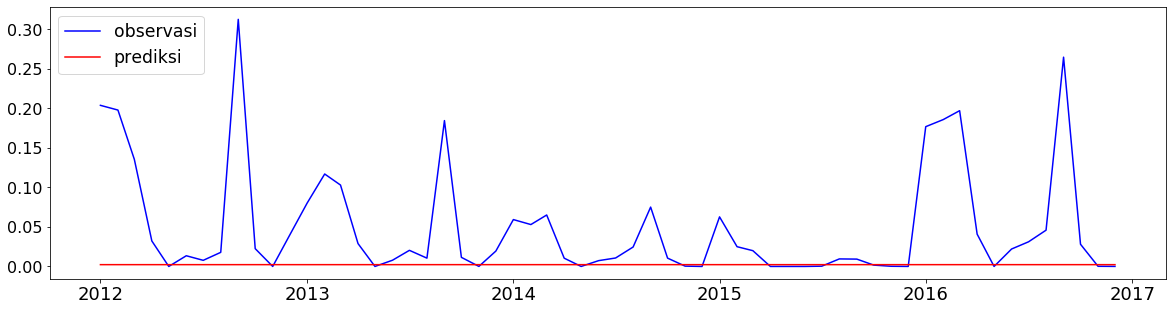

In [43]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

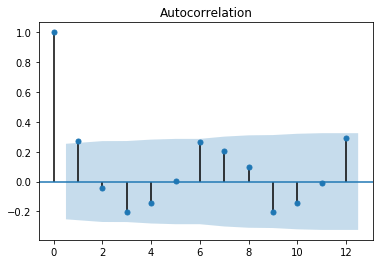

In [44]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

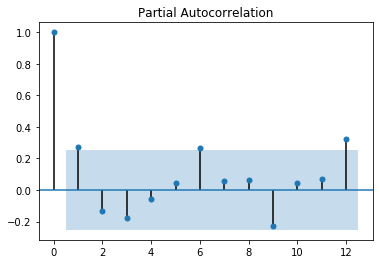

In [45]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

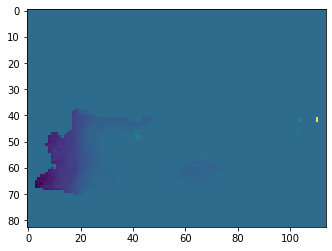

In [46]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [47]:
sum(mae)/60

0.047843549985558655

In [48]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [49]:
pred_list[pred_list==0]=-9999

In [50]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_8/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_8/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_8/201612.tif'

In [51]:
model.save('LSTM405060DENSE708090_adam_seed1.h5')